## Classroom DCGAN

In [5]:
import pickle
import numpy as np
from __future__ import print_function

import tensorflow as tf

#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import np_utils
import keras
import keras.backend as K

import math
import random
import imageio # for saving the image
import os
import numpy as np

import cv2
from matplotlib import pyplot as plt
#from tqdm import tqdm
import scipy.misc
from scipy.misc import imsave
%matplotlib inline

In [3]:
batch_size = 128
nb_classes = 1
nb_epoch = 100
eps = 1e-11
zed = 100

In [72]:
# Load generative model from disk
#e = 20
e = 25
json_file = open("../models_new/gm%s.json" % str(e), 'r')
loaded_model_json = json_file.read()
json_file.close()
gm = model_from_json(loaded_model_json)
# load weights into new model
gm.load_weights("../models_new/gm%s.h5" %str(e))
print("Loaded generative model from disk")

Loaded generative model from disk


In [22]:
# Load generative model from disk (Python version problem?)
#e = 20
#json_file = open("../models_new/dm%s.json" % str(e), 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#dm = model_from_json(loaded_model_json)
# load weights into new model
#dm.load_weights("../models_new/dm%s.h5" %str(e))
#print("Loaded discriminative model from disk")

### Saving generated images

In [11]:
def save_generated(n=10, dir="./generated"):
    for i in range(0, n):
        #generate image
        img_name = os.path.join(dir, "gen_img%s"%i + ".png")
        i = np.random.normal(loc=0.,scale=1.,size=(1,zed))
        gened = gm.predict([i])
        img = gened[0]
        imageio.imwrite(img_name, img) 

In [12]:
save_generated(10) 

/Users/Liis/anaconda_ete/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [-0.979055166245, 0.994649291039]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/Users/Liis/anaconda_ete/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [-0.997215569019, 0.999795794487]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/Users/Liis/anaconda_ete/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [-0.985377132893, 0.965790569782]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/Users/Liis/anaconda_ete/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [-0.998286128044, 0.995246291161]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/Users/Liis/anaconda_ete/lib/python2.7/site-packages/imageio/core/ut

### Latent space visualisation

In [24]:
def color_grid_vis(X, (nh, nw), save_path=None):
    h, w = X[0].shape[:2]
    img = np.zeros((h*nh, w*nw, 3))
    for n, x in enumerate(X):
        j = n/nw
        i = n%nw
        img[j*h:j*h+h, i*w:i*w+w, :] = x
    if save_path is not None:
        imsave(save_path, img)
    return img

In [73]:
n = 5
rand = np.random.normal(loc=0.,scale=1.,size=(n*n,zed))
gened = gm.predict([rand])
gened *= 0.5
gened *= 0.5

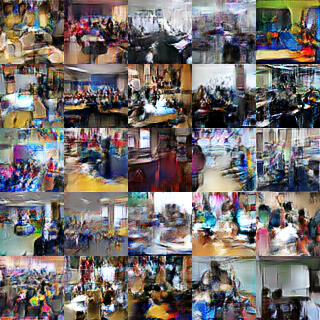

In [76]:
img = color_grid_vis(gened, (n, n), save_path=None)
rgb = scipy.misc.toimage(img) # generated images
rgb

In [ ]:
imsave('./sample.png', img)

In [79]:
def latent_vis(n=10):
    # stopping points
    vectors = [] 
    alphaValues = np.linspace(0, 1, 10)
    rand1 = np.random.normal(loc=0.,scale=1.,size=(1, zed))
    for i in range(n):
        rand2 = np.random.normal(loc=0.,scale=1.,size=(1, zed))  
        for alpha in alphaValues:
        # Latent space interpolation
            vector = rand1*(1-alpha) + rand2*alpha
            vectors.append(vector)
        rand1 = rand2
    vectors = np.array(vectors)
    vectors_flat = np.reshape(vectors, (n*n,n*n))
    gened = gm.predict([vectors_flat])
    gened *= 0.5
    gened *= 0.5
    img = color_grid_vis(gened, (n, n), save_path=None)
    return img

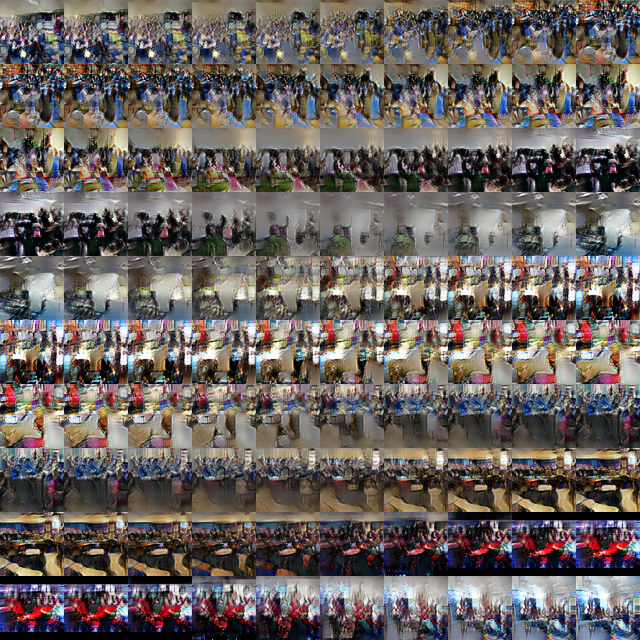

In [84]:
img = latent_vis(10)
rgb = scipy.misc.toimage(img) # just 100 generated images
rgb

In [85]:
imsave('./latent2.png', img)